### 04802-E Programming and Problem Solving for Data Analytics
### Recitation prepared by Oluwadara Adedeji
### Housing pricing prediction
### November 12th, 2022

#### Objectives
- Perform a regression task on a Kaggle competition
- Get familiar with machine learning libraries
- Guide the students through the machine learning process i.e EDA, data cleaning, feature engineering, modelling, evaluation etc.
- Perform enconding, scaling, pca on the data.
- Guide the students through hyperparameter tuning and stacking regressors
- Provide recommendations on how to improve the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold



In [2]:
# !pip install xgboost

### Data source

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [3]:
housing_data  = pd.read_csv("train.csv")

#Also get the test data from the data source
# test_data = pd.read_csv("test.csv")
housing_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# train_data = housing_data.drop('SalePrice', axis =1)

In [5]:
#Statistics
housing_data.describe(include = 'all', datetime_is_numeric=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
housing_data.shape

(1460, 81)

In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housing_data.shape

(1460, 81)

### Data Visualization

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


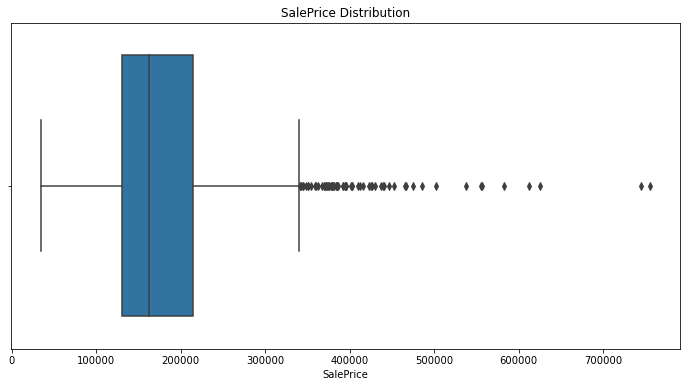

In [9]:
# A box plot showing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(housing_data.SalePrice)
plt.title('SalePrice Distribution');

Text(0, 0.5, 'Counts')

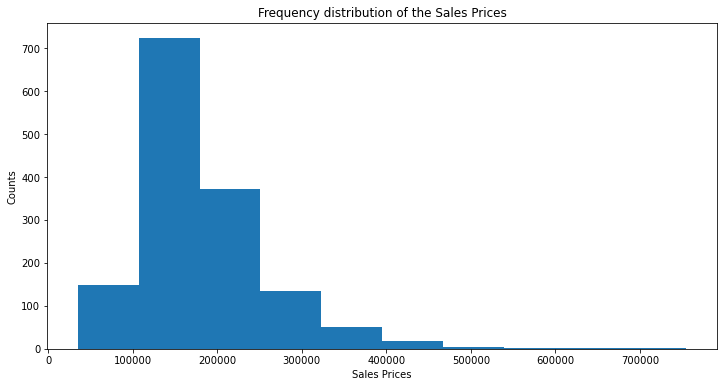

In [10]:
# A box plot showing outliers
plt.figure(figsize=(12, 6))
plt.title("Frequency distribution of the Sales Prices")
r = plt.hist(housing_data["SalePrice"])
plt.xlabel("Sales Prices")
plt.ylabel("Counts")

### Data Cleaning

In [11]:
numerical_housing = housing_data.select_dtypes(np.number)

In [12]:
categorical_housing = housing_data.select_dtypes(object)

In [13]:
numerical_housing

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [14]:
categorical_housing.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [15]:
#To drop columns with significant null values
thresh = categorical_housing.shape[0] * .2
categorical_housing.dropna(thresh = thresh, axis = 1, inplace = True)

<ipython-input-15-7d7137f2523f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_housing.dropna(thresh = thresh, axis = 1, inplace = True)


In [16]:
categorical_housing = categorical_housing.drop("FireplaceQu", axis=1)

In [17]:
#To fill every column with it most frequent value
categorical_housing = categorical_housing.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [18]:
categorical_housing.isnull().sum()


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [19]:
categorical_columns = categorical_housing.columns

In [20]:
categorical_columns;

In [21]:
#get columns that have less or greater than 4 unique values
columns_with_greater_than_4 = []
columns_with_less_than_4 = []
for column in categorical_columns:
    print(f'Column:{column},unique items:{categorical_housing[column].unique()}')
    if len(categorical_housing[column].unique()) > 4:
        columns_with_greater_than_4.append(column)
    else:
        columns_with_less_than_4.append(column)
        
    

Column:MSZoning,unique items:['RL' 'RM' 'C (all)' 'FV' 'RH']
Column:Street,unique items:['Pave' 'Grvl']
Column:LotShape,unique items:['Reg' 'IR1' 'IR2' 'IR3']
Column:LandContour,unique items:['Lvl' 'Bnk' 'Low' 'HLS']
Column:Utilities,unique items:['AllPub' 'NoSeWa']
Column:LotConfig,unique items:['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Column:LandSlope,unique items:['Gtl' 'Mod' 'Sev']
Column:Neighborhood,unique items:['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Column:Condition1,unique items:['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Column:Condition2,unique items:['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Column:BldgType,unique items:['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Column:HouseStyle,unique items:['2Story' '1Story' '1.5Fin' '1.5Unf' 

In [22]:
columns_with_greater_than_4;

In [23]:
categorical_housing.head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [24]:
#One hot encoding for categorical data with more than 4 unique values
categorical_encoded_4plus = pd.get_dummies(data=categorical_housing[columns_with_greater_than_4],prefix=columns_with_greater_than_4,drop_first=True)

In [25]:
categorical_encoded_4plus.shape

(1460, 163)

In [26]:
#Label encoding for categorical data less than or equal to 4 unique values
Encoder=LabelEncoder()

for column in columns_with_less_than_4:
    categorical_housing[column]=Encoder.fit_transform(categorical_housing[column])

#Can you apply a lamda function on the columns instead of a for loop?

In [27]:
categorical_housing[columns_with_less_than_4].shape

(1460, 14)

In [28]:
categorical_features = pd.concat([categorical_encoded_4plus, categorical_housing[columns_with_less_than_4]],axis=1)

In [29]:
#Get the shape of the categorical features
categorical_features.shape

(1460, 177)

In [30]:
#Check that no null values in the categorical features
sum(categorical_features.isnull().sum())

0

In [31]:
#Label encoding
categorical_housing[columns_with_less_than_4]

,Street,LotShape,LandContour,Utilities,LandSlope,MasVnrType,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,KitchenQual,GarageFinish,PavedDrive
0,1,3,3,0,0,1,2,2,3,3,1,2,1,2
1,1,3,3,0,0,2,3,2,3,1,1,3,1,2
2,1,0,3,0,0,1,2,2,3,2,1,2,1,2
3,1,0,3,0,0,2,3,3,1,3,1,2,2,2
4,1,0,3,0,0,1,2,2,3,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,3,3,0,0,2,3,2,3,3,1,3,1,2
1456,1,3,3,0,0,3,3,2,3,3,1,3,2,2
1457,1,3,3,0,0,2,0,3,1,3,1,2,1,2
1458,1,3,3,0,0,2,3,3,3,2,1,2,2,2


In [32]:
categorical_encoded_4plus

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
#Explore the numerical features
numerical_housing.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [34]:
#Process the numerical data
numerical_housing["LotFrontage"].fillna(numerical_housing["LotFrontage"].mean(), inplace = True)
numerical_housing["GarageYrBlt"].fillna(numerical_housing["GarageYrBlt"].mean(), inplace = True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [35]:
numerical_housing.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [36]:
#Get columns of the numerical data
numerical_columns = numerical_housing.columns

In [37]:
#Check all Saleprice

In [38]:
#All numerical minus salesprice
features = pd.concat([categorical_features, numerical_housing],axis=1)

In [39]:
#Clear every other null values
for column in features.columns:
    features[column].fillna(features[column].mean(), inplace = True)

In [40]:
#Confirm that no null values in the features
sum(features.isnull().sum())

0

In [41]:
features.shape

(1460, 215)

In [42]:
#Plot the salesprices against numerical_housing?

# plt.figure(figsize=(13,10))
# plt.title("")
# for column in numerical_columns:
#     plt.scatter(numerical_housing[column],housing_data["SalePrice"], label = column)
# plt.xlabel("Year")
# plt.ylabel("Gross debt-to-income ratio of households")

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)



In [43]:
#Normalize the numerical data. Why? Do this for numerical data or not?
scaler=StandardScaler() 
features[numerical_columns[:-1]]=scaler.fit_transform(features[numerical_columns[:-1]])

In [44]:
sum(features.isnull().sum())

0

In [45]:
# fig, ax = plt.subplots(figsize=(25,20))
# sns.heatmap(features.corr(), annot = True).set(title ="Correlation matrix of the features")

In [46]:
features

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,0,0,0,1,0,0,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,0,0,1,0,0,1,0,0,0,0,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,0,0,1,0,0,0,0,1,0,0,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,0,0,1,0,0,0,0,0,0,0,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000
4,0,0,1,0,0,1,0,0,0,0,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,1,0,0,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,175000
1456,0,0,1,0,0,0,0,1,0,0,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,210000
1457,0,0,1,0,0,0,0,1,0,0,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,266500
1458,0,0,1,0,0,0,0,1,0,0,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,142125


#### Model

In [47]:
X = features.drop(["SalePrice"], axis = 1)

In [48]:
X

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,0,0,0,1,0,0,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0,0,1,0,0,1,0,0,0,0,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0,0,1,0,0,0,0,1,0,0,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0,0,1,0,0,0,0,0,0,0,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0,0,1,0,0,1,0,0,0,0,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,1,0,0,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,0,0,1,0,0,0,0,1,0,0,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0,0,1,0,0,0,0,1,0,0,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,0,0,1,0,0,0,0,1,0,0,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [49]:
y = housing_data['SalePrice']

In [50]:
#List of metrics in sklearn
sorted(sklearn.metrics.SCORERS.keys());

#### LinearRegression

In [51]:
#Using cross_validation 

xg_b = LinearRegression()
xg_b.fit(X, y)
mse = cross_val_score(xg_b, X, y, cv= 10, scoring="neg_mean_squared_error").mean()
print('Root Mean Squared Error for Linear regression is', (-1*mse)**0.5)

#Can you explore Kfold, stratifiedKfold?

Root Mean Squared Error for Linear regression is 8267385359345647.0


#### XGBRegressor

In [52]:
#Using cross_validation
xg_b = XGBRegressor( use_label_encoder = False)
xg_b.fit(X, y)
mse = cross_val_score(xg_b, X, y, cv= 10, scoring="neg_mean_squared_error").mean()
print('Root Mean Squared Error for Xg Boost is', (-1*mse)**0.5)


Root Mean Squared Error for Xg Boost is 27572.341184282075


#### It is observed that XGBRegressor performs better

##### PCA

In [53]:
# define transform
pca = PCA(n_components=10)
# prepare transform on dataset
pca.fit(X)
# apply transform to dataset
transformed = pca.transform(X)

In [54]:
X_pca = transformed

In [55]:
X_pca.shape

(1460, 10)

In [56]:
#Did the performance improve?
xg_b = XGBRegressor( use_label_encoder = False)
xg_b.fit(X_pca, y)
mse = cross_val_score(xg_b, X_pca, y, cv= 10, scoring="neg_mean_squared_error").mean()
print('Root Mean Squared Error for Xg Boost is', (-1*mse)**0.5)

Root Mean Squared Error for Xg Boost is 29667.40936166795


In [57]:
#Can you use hold-out(i.e train test split) instead of cross validation?
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=1) <= skeleton

### Improving the model

In [58]:
#Hyperparameter tuning
xg_b = XGBRegressor( use_label_encoder = False)
parameters={
             "sampling_method" : ["uniform", "gradient_based"],\
             "tree_method" : ["auto", "exact", "approx","hist", "gpu_hist" ],\
             "grow_policy" : ["depthwise", "lossguide"]\
             }  #You can get the parameters from the online documentation
gd_search=GridSearchCV(estimator=xg_b, param_grid=parameters,cv=10, n_jobs=1,verbose=2,scoring="neg_mean_squared_error")

In [59]:
gd_search.fit(X_pca,y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.2s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.2s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.2s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.1s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.1s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.2s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.2s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.2s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.2s
[CV] END grow_policy=depthwise, sampling_method=uniform, tree_method=auto; total time=   0.

[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=hist; total time=   0.3s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=hist; total time=   0.3s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=hist; total time=   0.3s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=hist; total time=   0.3s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=hist; total time=   0.3s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=hist; total time=   0.3s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=hist; total time=   0.3s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=gpu_hist; total time=   1.5s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=gpu_hist; total time=   1.5s
[CV] END grow_policy=depthwise, sampling_method=gradient_based, tree_method=gpu_his

[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=exact; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=exact; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=exact; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=approx; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=approx; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=approx; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=approx; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=approx; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=approx; total time=   0.2s
[CV] END grow_policy=lossguide, sampling_method=gradient_based, tree_method=

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    use_label_encoder=False,
               

In [60]:
results = pd.DataFrame(gd_search.cv_results_)

In [61]:
results;

In [62]:
gd_search.best_params_  #Can you use string manipulation to pass this parameters to your model without editing?

{'grow_policy': 'depthwise',
 'sampling_method': 'uniform',
 'tree_method': 'auto'}

In [63]:
#Did the performance improve?
xg_b = XGBRegressor( grow_policy = 'depthwise',
 sampling_method = 'uniform',
 tree_method = 'auto',use_label_encoder = False)
xg_b.fit(X_pca, y)
mse = cross_val_score(xg_b, X_pca, y, cv= 10, scoring="neg_mean_squared_error").mean()
print('Root Mean Squared Error for Xg Boost is', (-1*mse)**0.5)

Root Mean Squared Error for Xg Boost is 29667.40936166795


#### No change in the result since the best parameters selected are the default values

##### Stacking models and pciking the best

In [64]:
#reference: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

def get_stacking():
    # define the base models
    level0 = list()     #Can you use a dictionary instead?
    #level0.append(('mlp', MLPRegressor()))
    level0.append(('xgb', XGBRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('light', LGBMRegressor()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    #models['mlp'] = MLPRegressor()
    models['xgb'] = XGBRegressor()
    models['svm'] = SVR()
    models['light'] = LGBMRegressor()
    models['stacking'] = get_stacking()
    return models


 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1, error_score='raise')
    return (-1*scores)**0.5

In [65]:
# evaluate the models and store results
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_pca, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>xgb 28805.953 (6515.396)
>svm 81107.491 (6225.339)
>light 30348.660 (6001.722)
>stacking 28574.832 (5207.450)


### Recommendations
- Use models with better performance than svm and lightgbm to get better results
- You can also perform grid search on each model, or even perform grid search on combination of models and select the best 3 or 4 to stack into your StackingRegressor. Also explore different parameters for these models.
- Perform more visualization on the features. What does it tell you? Can you generate better features?
- Can you fill the null values with a better statistic than the mean?
- Deal with outliers (e.g with wisconsin, etc.)
- Is there causality in the data? Explore wrapper methods such as forward and backward stepwise regression to select features
- Also explore other feature techniques like Filter methods (correlation coefficient, variance threshold etc.), embedded methods like Lasso regularization, and random forest importance.
- Explore using model pipelines( i.e steps = [encoding,normalization,pca,algorithm], model = Pipeline(steps=steps))
- Is it possible to perform PCA before encoding? If yes, does it improve the model?

#### Prediction

In [66]:
#Get the test data on Kaggle, processs the test_data as it has been done, or make your own processing(and do same for train data)
# , predict on the test_data and submit to check your performance on the leaderboard

# output = pd.DataFrame({"Id": test_data.Id, "SalePrice": prediction})
# output.to_csv("submission.csv", index=False)